# ANALYSIS WORKFLOW

### Introduction
In this Jupyter notebook, we characterize marine heatwave events with an imprint in the northeast Pacific. This is because we are interested in 'Blob'-like events. Here, we attempt to answer: Can we characterize marine heatwave events with an imprint in the northeast Pacific? How? How important is ENSO variability?

### Before this notebook, we ...
1. Applied Ocetrac to all ensemble members
2. Collected marine heatwave events with an imprint in the northeast Pacific Ocean that last longer than 2 months and covers at least 25% of our pre-defined region.
3. Calculated Nino3.4 and Nino4.0 indices

### We now work with a dataset of 1131 heatwaves.

##### Import packages

In [1]:
import xarray as xr; import numpy as np; import pandas as pd; import netCDF4 as nc; import scipy
import matplotlib.pyplot as plt; import cmocean; import seaborn as sns

##### Load datafiles

In [2]:
%%time

# Let's get our saved data files. We have a total of 1131 heatwaves.
file0 = '/glade/work/cassiacai/member0_9_bloblike_events_new_stuff.nc' # 118 MHWs 
file1 = '/glade/work/cassiacai/member10_19_bloblike_events_new_stuff.nc' # 99 MHWs
file2 = '/glade/work/cassiacai/member20_29_bloblike_events_new_stuff.nc' # 121 MHWs
file3 = '/glade/work/cassiacai/member30_39_bloblike_events_new_stuff.nc' # 116 MHWs
file4 = '/glade/work/cassiacai/member40_49_bloblike_events_new_stuff.nc' # 116 MHWs
file5 = '/glade/work/cassiacai/member50_59_bloblike_events_new_stuff.nc' # 123 MHWs
file6 = '/glade/work/cassiacai/member60_69_bloblike_events_new_stuff.nc' # 112 MHWs
file7 = '/glade/work/cassiacai/member70_79_bloblike_events_new_stuff_.nc' # 105 MHWs
file8 = '/glade/work/cassiacai/member80_89_bloblike_events_new_stuff_.nc' # 99 MHWs
file9 = '/glade/work/cassiacai/member90_99_bloblike_events_new_stuff_.nc' # 122 MHWs

files = [file0, file1, file2, file3, file4, file5, file6, file7, file8, file9]

blob_files = []
for i in range(len(files)):
    blob_file_name = xr.open_dataset(files[i])
    blob_files.append(blob_file_name)

CPU times: user 143 ms, sys: 49.9 ms, total: 193 ms
Wall time: 1.41 s


In [3]:
land_mask = np.load('SST_land.npy')
land_mask[land_mask > 0] = np.nan
land_mask[land_mask == 0.] = 1

### November 30, 2022 ____________________________________________________________________________ start

In [67]:
##### LOADING IN PACKAGES #--------------------------------------------------------------
import s3fs; import xarray as xr; import numpy as np
import pandas as pd; 
import dask.array as da
import ocetrac

import matplotlib.pyplot as plt; import cartopy.crs as ccrs

import warnings; import expectexception
warnings.filterwarnings('ignore')

import netCDF4 as nc; import datetime as dt
import scipy

import intake; import pprint
# Allow multiple lines per cell to be displayed without print (default is just last line)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Enable more explicit control of DataFrame display (e.g., to omit annoying line numbers)
from IPython.display import HTML

In [68]:
# Open original collection description file #----------------------------------------------
cat_url_orig = '/glade/collections/cmip/catalog/intake-esm-datastore/catalogs/glade-cesm2-le.json'
coll_orig = intake.open_esm_datastore(cat_url_orig)

In [70]:
subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical')
member_id_list = subset.df.member_id.unique()

In [78]:
for i in range(0,1):
    subset = coll_orig.search(component='atm',variable='SST',frequency='month_1',experiment='historical',member_id= str(member_id_list[i]))
    dsets = subset.to_dataset_dict(zarr_kwargs={"consolidated": True}, storage_options={"anon": True})
    ds = dsets['atm.historical.cam.h0.cmip6.SST'] # before 50
    # ds = dsets['atm.historical.cam.h0.smbb.SST'] # after 50 # Ask Liz
    SST = ds.SST.isel(member_id=0)
    SST.load()


--> The keys in the returned dictionary of datasets are constructed as follows:
	'component.experiment.stream.forcing_variant.variable'


<xarray.DataArray 'SST' (time: 1980, lat: 192, lon: 288)>
array([[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [271.33502, 271.335  , 271.33496, ..., 271.33514, 271.3351 ,
         271.33508],
        [271.3414 , 271.3414 , 271.34137, ..., 271.34146, 271.34143,
         271.3414 ],
        [271.34573, 271.34573, 271.34573, ..., 271.34576, 271.34573,
         271.34573]],

       [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
...
        [271.39133, 271.39127, 271.39124, ..., 271.39154, 271.39145,
         271.39142],
        [271.3968 , 271.39676, 271.39673, ..., 271.39688, 271.39685,
         271.39682],
        [271.40018, 271.40015, 271.40015, ..., 271.40018, 271.40018,
         271.40018]],

       [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
           0.     ],
        ...,
        [271.3778 , 271.37772, 271.37762, ..., 271.37802, 271.37796,
         271.3779 ],
        [271.38275, 271.38272, 271.38266, ..., 271.38287, 271.38284,
         271.38278],
        [271.38614, 271.38614, 271.38614, ..., 271.38617, 271.38617,
         271.38617]]], dtype=float32)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time       (time) object 1850-02-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  <U11 'r1i1001p1f1'
Attributes:
    units:         K
    long_name:     sea surface temperature
    cell_methods:  time: mean

In [83]:
SST = SST[-481:,:,:]

In [86]:
file_number = 0
SSTa_woarctic = blob_files[file_number].SSTA[:,:,0:160,:]
SSTa = blob_files[file_number].SSTA[:,:,:]

In [127]:
# time component
ssta_mean_time = ssta_woarctic[:,:,:,:].mean(axis=(2,3))

In [154]:
# get relevant time indices
time_indices = []
mhw_lengths = []
for i in range(ssta_mean_time.shape[0]):
    time_indices.append(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten())
    mhw_lengths.append(len(np.argwhere(np.isfinite(ssta_mean_time[i].values)).flatten()))

Text(0.5, 1.0, 'Histogram of MHW Lengths')

(array([18., 35., 19.,  8., 11., 11.,  7.,  3.,  1.,  3.]),
 array([ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36, 40]),
 <BarContainer object of 10 artists>)

Text(0.5, 0, 'Duration (months)')

Text(0, 0.5, 'Frequency')

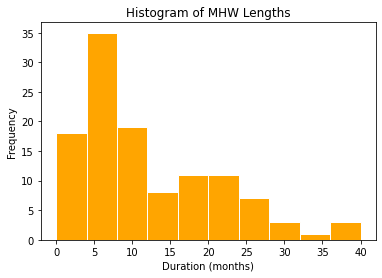

In [178]:
plt.title('Histogram of MHW Lengths')
plt.hist(mhw_lengths, bins=np.arange(0,44,4), lw=1,ec="white", fc="orange", alpha=1)
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.show()

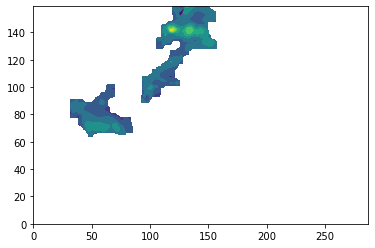

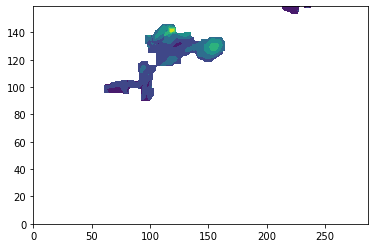

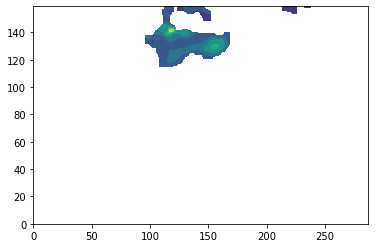

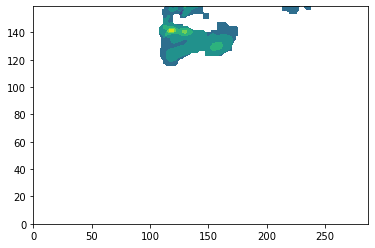

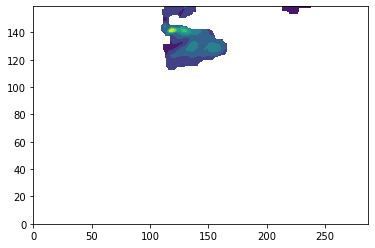

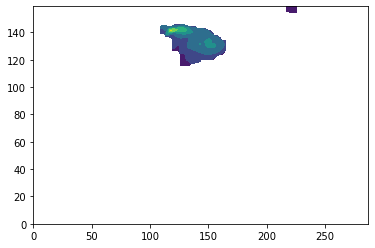

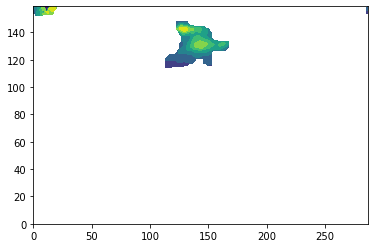

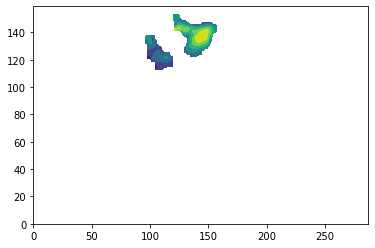

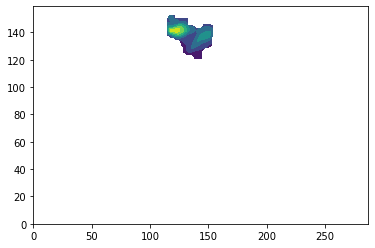

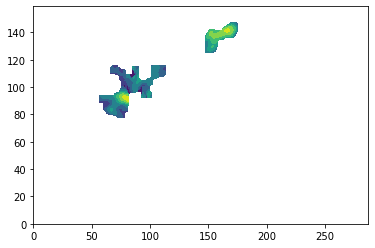

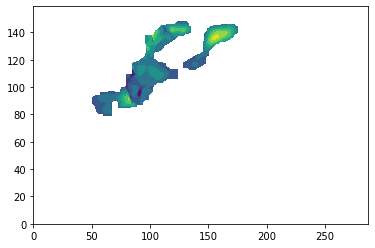

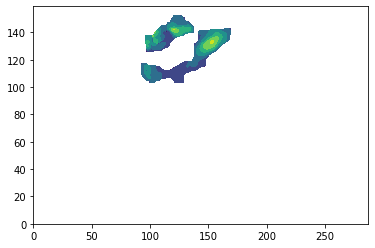

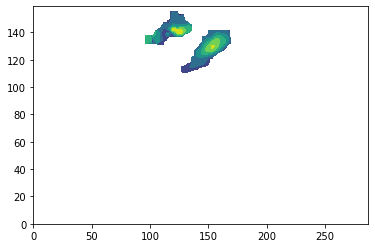

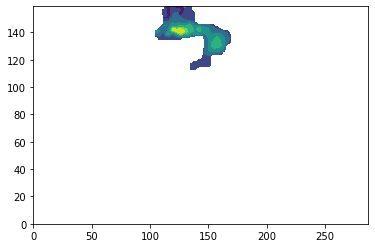

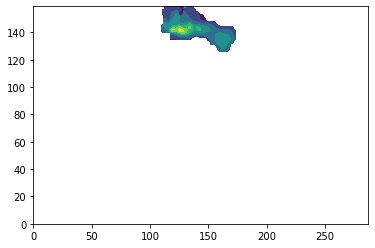

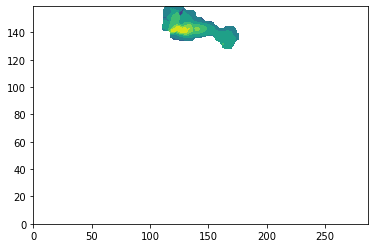

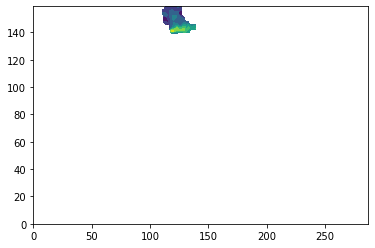

In [153]:
for i in time_indices[0]:
    plt.contourf(SSTa_woarctic[0][i])
    plt.show()

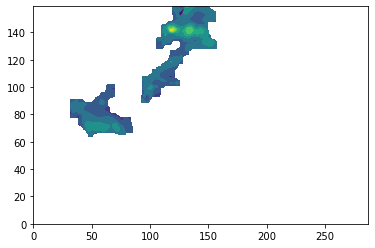

In [151]:
plt.contourf(SSTa_woarctic[0][0])
plt.show()

In [136]:
np.argwhere(np.isfinite(ssta_mean_time[0].values)).flatten() # get relevant time indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [131]:
ssta_mean_time[0]

<xarray.DataArray 'SSTA' (time: 481)>
array([0.89700306, 0.93790221, 1.12443968, 1.17087708, 1.20636939,
       1.66040141, 1.57322572, 1.36050668, 1.66078078, 1.03661983,
       1.10563026, 1.09078585, 1.24512006, 1.28163198, 1.27421601,
       1.22637544, 1.1505659 ,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
...
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan])
Coordinates:
  * time       (time) object 1975-01-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  object 'r1i1001p1f1'
    quantile   float64 0.9
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1

In [129]:
ssta_woarctic[:3,:,:,:]

<xarray.DataArray 'SSTA' (heatwave_label: 3, time: 481, lat: 160, lon: 288)>
[66493440 values with dtype=float64]
Coordinates:
  * time       (time) object 1975-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 57.96 58.9 59.84
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    member_id  (heatwave_label) object ...
    quantile   float64 0.9
    month      (time) int64 ...
Dimensions without coordinates: heatwave_label

In [109]:
airtemps_CNA = SST[0,:,:].where(SSTa[0,0,:,:] > 0)

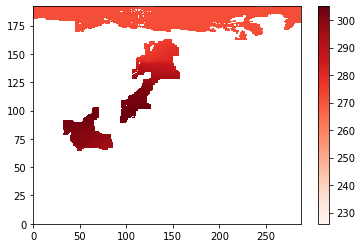

In [124]:
plt.pcolormesh(airtemps_CNA, cmap='Reds')
plt.colorbar()

In [94]:
SSTa[0,0,:,:]

<xarray.DataArray 'SSTA' (lat: 192, lon: 288)>
array([[     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       [     nan,      nan,      nan, ...,      nan,      nan,      nan],
       ...,
       [0.049944, 0.050026, 0.050102, ..., 0.049639, 0.049733, 0.049814],
       [0.049255, 0.049309, 0.049371, ..., 0.049043, 0.049131, 0.049194],
       [0.050668, 0.050673, 0.050675, ..., 0.050648, 0.050657, 0.050663]])
Coordinates:
    time       object 1975-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    member_id  object 'r1i1001p1f1'
    quantile   float64 0.9
    month      int64 1

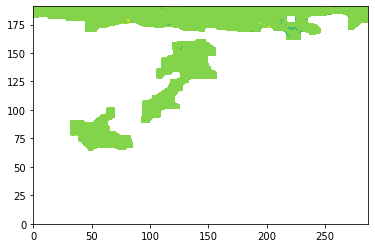

In [90]:
plt.contourf(SSTa[0,0,:,:])

In [44]:
# time component
ssta_mean_time = ssta_woarctic[:,:,:,:].mean(axis=(2,3))

In [125]:
ssta_mean_time[0,:].notnull()

<xarray.DataArray 'SSTA' (time: 481)>
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
...
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])
Coordinates:
  * time       (time) object 1975-01-01 00:00:00 ... 2015-01-01 00:00:00
    member_id  object 'r1i1001p1f1'
    quantile   float64 0.9
    month      (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12 1

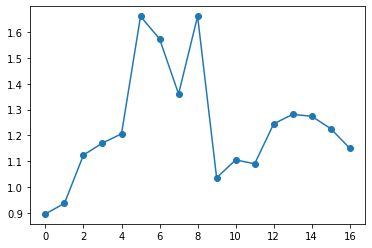

In [66]:
x = ssta_mean_time[0,:].values
x[~np.isnan(x)]
plt.scatter(np.arange(len(x)), x)
plt.plot(np.arange(len(x)), x)
plt.show()

In [ ]:
# # how many have an ENSO signal?
# cropped_to_enso_signal_region = cumulative_SSTA_shapes.sel(lat=slice(-10,10), lon=slice(120,290))
# # cropped_to_enso_signal_region[0,:,:].values

In [18]:
woarctic

<xarray.DataArray 'SSTA' (heatwave_label: 118, time: 481, lat: 160, lon: 288)>
[2615408640 values with dtype=float64]
Coordinates:
  * time       (time) object 1975-01-01 00:00:00 ... 2015-01-01 00:00:00
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 57.96 58.9 59.84
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    member_id  (heatwave_label) object ...
    quantile   float64 0.9
    month      (time) int64 ...
Dimensions without coordinates: heatwave_label

### November 30, 2022 ____________________________________________________________________________ end

##### Pre-processing
We do not want the Arctic. Arctic circle is approximately 66°N, which is why our lat is 0:160

In [4]:
file_number = 0

In [5]:
# ---------- cumulative SSTa
cumulative_SSTA_shapes = blob_files[file_number].SSTA[:,:,0:160,:].sum(dim='time')

In [15]:
cumulative_SSTA_shapes[0,:,:].values

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.07339848, 1.14644524, 1.28070854, ..., 0.        , 0.98697391,
        1.04007523],
       [1.21792841, 1.28363832, 1.36405543, ..., 0.        , 0.87939722,
        1.08639002],
       [1.23582292, 1.33947909, 1.41305742, ..., 0.        , 0.71951406,
        1.03675648]])

In [6]:
# ---------- mean SSTa
mean_SSTA_shapes = blob_files[file_number].SSTA[:,:,0:160,:].mean(dim='time')

In [7]:
mhw_identifier = 113

In [8]:
mhw_cSSTa = cumulative_SSTA_shapes[mhw_identifier].values
mhw_cSSTa[mhw_cSSTa == 0. ] = np.nan

In [9]:
mhw_meanSSTa = mean_SSTA_shapes[mhw_identifier].values
mhw_meanSSTa[mhw_meanSSTa == 0. ] = np.nan

In [10]:
# ---------- area touched
copy_cumulative_SSTA_shapes = np.copy(cumulative_SSTA_shapes)

only_area_touched = []
cumulative_area = []

for i in range(len(copy_cumulative_SSTA_shapes)):
    mhw_carea = copy_cumulative_SSTA_shapes[i]
    mhw_carea[mhw_carea == 0. ] = np.nan
    mhw_carea[mhw_carea < 0. ] = 1.
    mhw_carea[mhw_carea > 0. ] = 1.
    only_area_touched.append(mhw_carea)
    cumulative_area.append(np.nansum(mhw_carea))
    
cumulative_area_ind = np.flip(np.argsort(cumulative_area))
sorted_cumulative_area = np.flip(np.sort(cumulative_area))

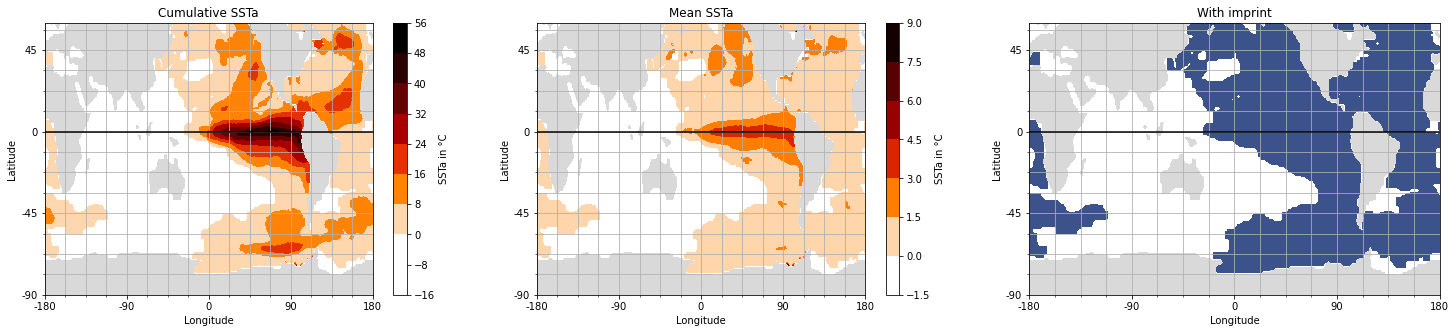

In [14]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(25,5))

ax1.set_title("Cumulative SSTa")
im1 = ax1.contourf(mhw_cSSTa,cmap='gist_heat_r',vmin=0, vmax=np.nanmax(mhw_cSSTa))
fig.colorbar(im1, ax=ax1, orientation='vertical',label='SSTa in °C')
ax1.contourf(land_mask[0:160,:], cmap='Greys')
ax1.minorticks_on()
ax1.axhline(y=95.5, c='k', linestyle='-') # this is the equator line
ax1.set_xticks([0, 71.75, 143.5, 215.25, 287]);ax1.set_xticklabels([-180, -90, 0, 90, 180])
ax1.set_yticks([0, 47.75, 95.5, 143.25]);ax1.set_yticklabels([-90, -45, 0, 45])
ax1.set_xlabel('Longitude'); ax1.set_ylabel('Latitude')
ax1.grid(which='both')

ax2.set_title("Mean SSTa")
im2 = ax2.contourf(mhw_meanSSTa,cmap='gist_heat_r',vmin=0, vmax=np.nanmax(mhw_meanSSTa))
fig.colorbar(im2, ax=ax2, orientation='vertical',label='SSTa in °C')
ax2.contourf(land_mask[0:160,:], cmap='Greys')
ax2.minorticks_on()
ax2.axhline(y=95.5, c='k', linestyle='-') # this is the equator line
ax2.set_xticks([0, 71.75, 143.5, 215.25, 287]);ax2.set_xticklabels([-180, -90, 0, 90, 180])
ax2.set_yticks([0, 47.75, 95.5, 143.25]);ax2.set_yticklabels([-90, -45, 0, 45])
ax2.set_xlabel('Longitude'); ax2.set_ylabel('Latitude')
ax2.grid(which='both')

ax3.set_title("With imprint")
im3 = ax3.contourf(only_area_touched[mhw_identifier])
ax3.contourf(land_mask[0:160,:], cmap='Greys')
ax3.minorticks_on()
ax3.axhline(y=95.5, c='k', linestyle='-') # this is the equator line
ax3.set_xticks([0, 71.75, 143.5, 215.25, 287]);ax3.set_xticklabels([-180, -90, 0, 90, 180])
ax3.set_yticks([0, 47.75, 95.5, 143.25]);ax3.set_yticklabels([-90, -45, 0, 45])
ax3.set_xlabel('Longitude'); ax3.set_ylabel('Latitude')
ax3.grid(which='both')

plt.show()

In [15]:
length_of_heatwave = []
first_month = []; first_year = []
last_month = []; last_year = []
for i in range(blob_files[file_number].SSTA[:,:,0:160,:].shape[0]):
    shortened= blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).dropna(dim="time", how="any")
    length_of_heatwave.append(shortened.shape[0])
    first_month.append(shortened[0].time.month.values)
    last_month.append(shortened[-1].time.month.values)

Text(0, 0.5, 'frequency')

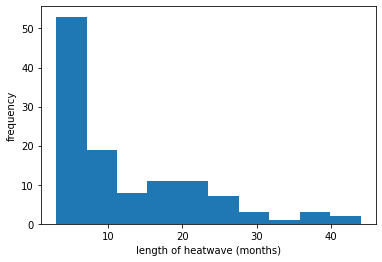

In [17]:
plt.hist(length_of_heatwave)
plt.xlabel('length of heatwave (months)')
plt.ylabel('frequency')

In [240]:
length_of_heatwave[mhw_identifier]

24

In [241]:
length_of_heatwave = []
first_month = []
last_month = []

# related to intensity
mean_SSTa_timeseries = []
max_SSTa_timeseries = []

for i in range(blob_files[file_number].SSTA[:,:,0:160,:].shape[0]):
    shortened_mean= blob_files[file_number].SSTA[i,:,0:160,:].mean(axis=(1,2)).dropna(dim="time", how="any")
    shortened_max= blob_files[file_number].SSTA[i,:,0:160,:].max(axis=(1,2)).dropna(dim="time", how="any")
    
    mean_SSTa_timeseries.append(shortened_mean.values)
    max_SSTa_timeseries.append(shortened_max.values)
    
    length_of_heatwave.append(shortened_mean.shape[0])
    first_month.append(shortened_mean[0].time.month.values)
    last_month.append(shortened_mean[-1].time.month.values)

In [297]:
cumulative_area_ind = np.flip(np.argsort(cumulative_area))
sorted_cumulative_area = np.flip(np.sort(cumulative_area))

In [302]:
length_of_heatwave_ind = np.flip(np.argsort(length_of_heatwave))
sorted_length_of_heatwave = np.flip(np.sort(length_of_heatwave))

In [320]:
# the evolution
firstind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[mhw_identifier,:,0:160,:].mean(axis=(1,2)).values)).flatten()[0]
lastind = np.argwhere(np.isfinite(blob_files[file_number].SSTA[mhw_identifier,:,0:160,:].mean(axis=(1,2)).values)).flatten()[-1]
print(firstind)
print(lastind)

21
58


In [321]:
ax2.set_xticks([0, 71.75, 143.5, 215.25, 287]);ax2.set_xticklabels([-180, -90, 0, 90, 180])
ax2.set_yticks([0, 47.75, 95.5, 143.25]);ax2.set_yticklabels([-90, -45, 0, 45])
ax2.set_xlabel('Longitude'); ax.set_ylabel('Latitude')
ax2.grid(which='both')

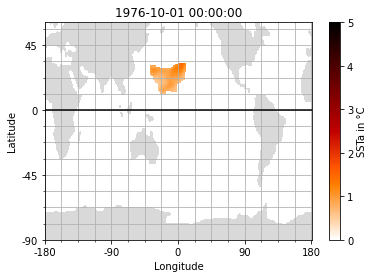

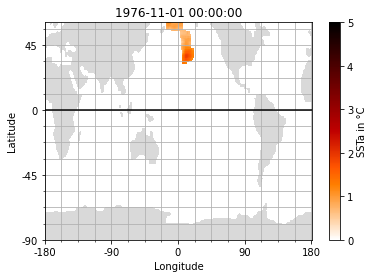

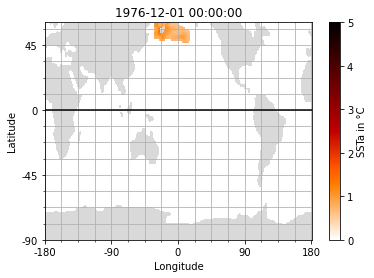

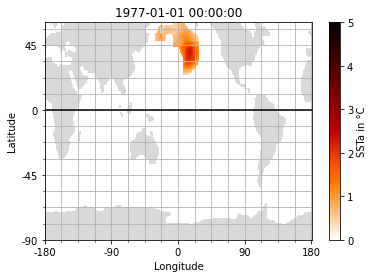

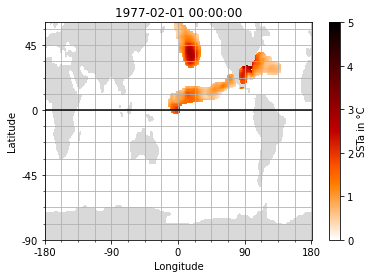

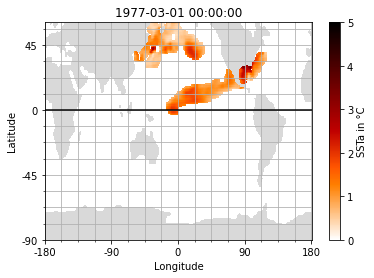

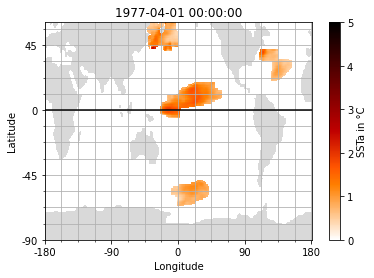

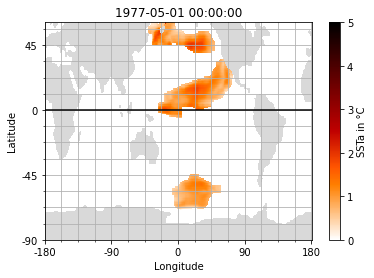

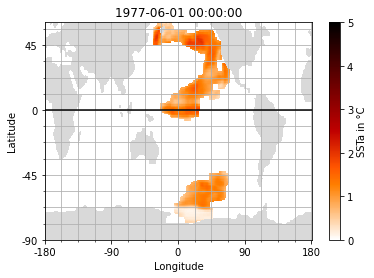

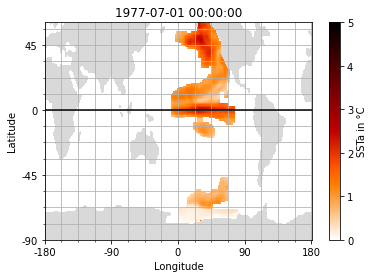

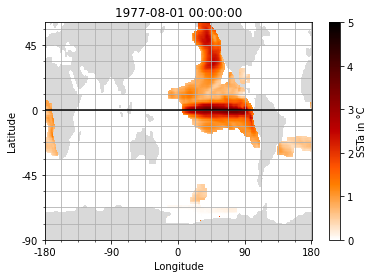

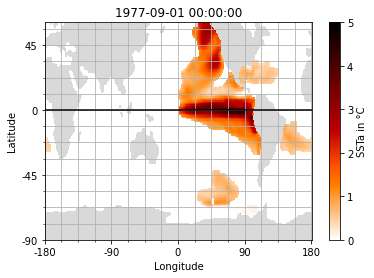

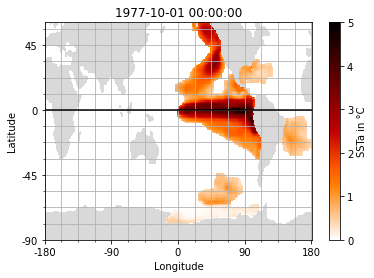

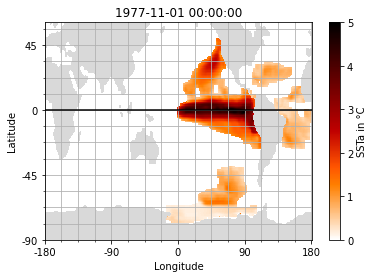

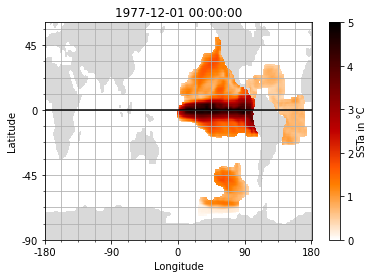

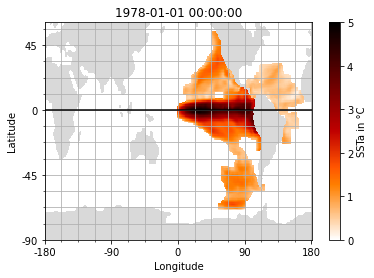

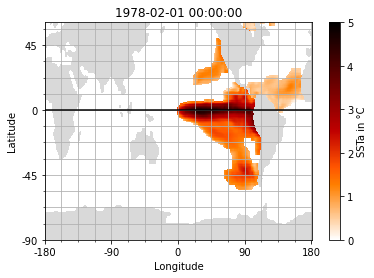

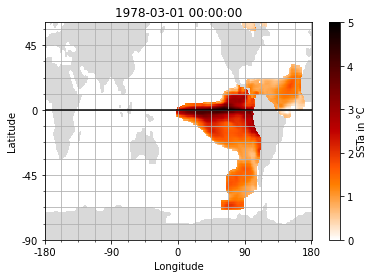

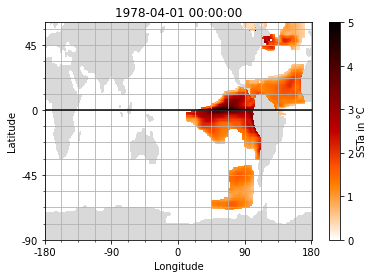

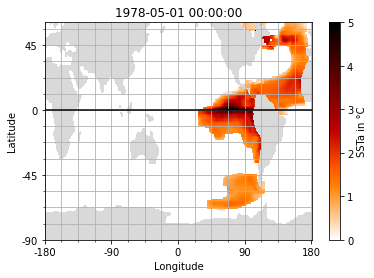

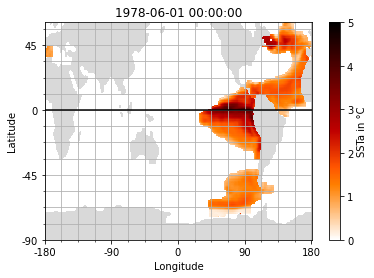

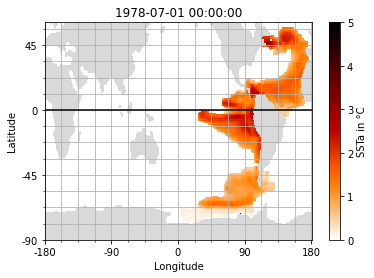

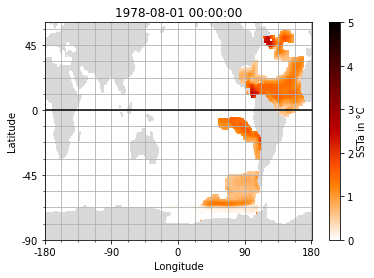

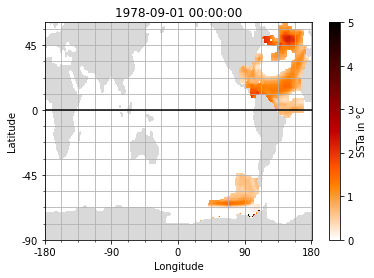

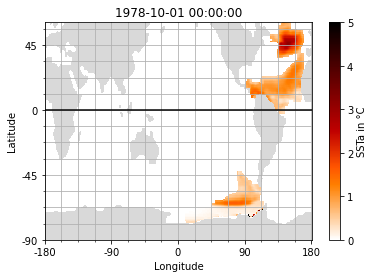

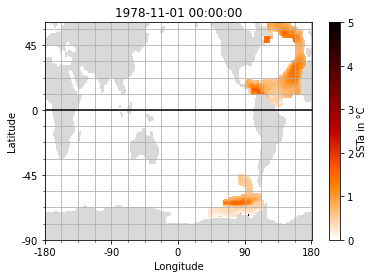

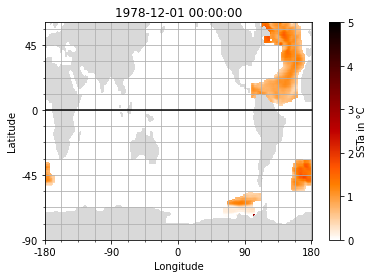

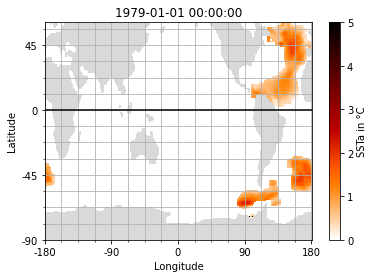

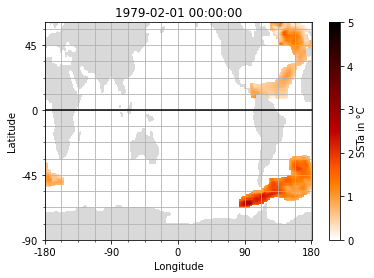

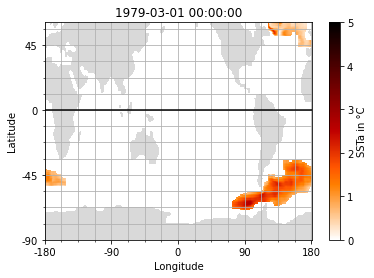

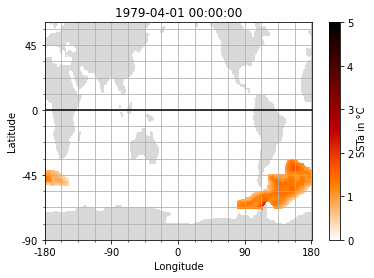

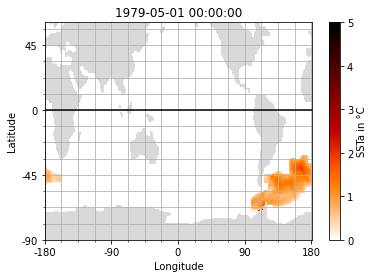

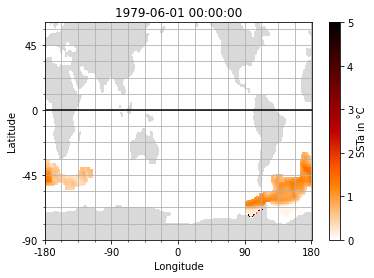

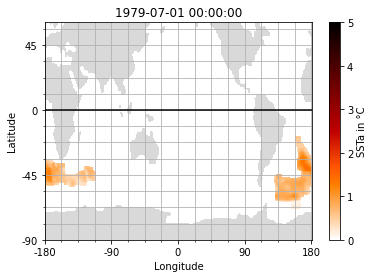

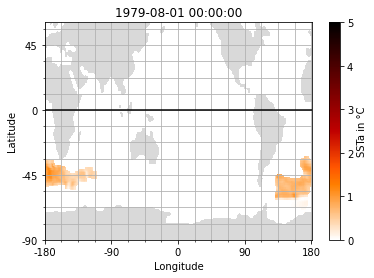

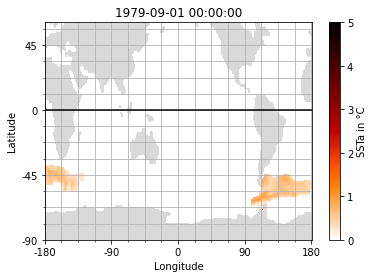

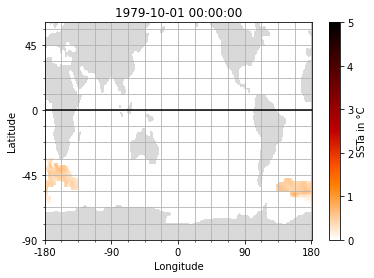

In [322]:
for i in range(firstind, lastind):
    plt.title(str(blob_files[file_number].SSTA[mhw_identifier,i,0:160,:].time.values))
    im = plt.pcolor(blob_files[file_number].SSTA[mhw_identifier,i,0:160,:],cmap='gist_heat_r',vmin=0, vmax=5)
    cbar = plt.colorbar(im, label='SSTa in °C')
    plt.contourf(land_mask[0:160,:], cmap='Greys')
    plt.minorticks_on()
    plt.axhline(y=95.5, c='k', linestyle='-') # this is the equator line
    plt.xticks([0, 71.75, 143.5, 215.25, 287], labels = [-180, -90, 0, 90, 180])
    plt.yticks([0, 47.75, 95.5, 143.25], labels = [-90, -45, 0, 45])
    plt.xlabel('Longitude'); plt.ylabel('Latitude')
    plt.grid(which='both')
    plt.savefig('evolution_blob113_timestep{}.png'.format(i))
    plt.show()

In [296]:
import imageio

with imageio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['evolution_blob10_timestep365.png', 'evolution_blob10_timestep366.png',
                    'evolution_blob10_timestep367.png','evolution_blob10_timestep368.png',
                    'evolution_blob10_timestep369.png','evolution_blob10_timestep370.png',
                    'evolution_blob10_timestep371.png','evolution_blob10_timestep372.png',
                    'evolution_blob10_timestep373.png','evolution_blob10_timestep374.png',
                    'evolution_blob10_timestep375.png','evolution_blob10_timestep376.png',
                    'evolution_blob10_timestep377.png','evolution_blob10_timestep378.png',
                    'evolution_blob10_timestep379.png','evolution_blob10_timestep380.png',
                    'evolution_blob10_timestep381.png','evolution_blob10_timestep382.png',
                    'evolution_blob10_timestep383.png','evolution_blob10_timestep384.png',
                    'evolution_blob10_timestep385.png','evolution_blob10_timestep386.png',
                    'evolution_blob10_timestep387.png',
                    ]:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_original = 'mygif.gif'
gif_speed_up = 'foo2.gif'
gif = imageio.mimread(gif_original)
imageio.mimsave(gif_speed_up, gif, fps=5)

In [323]:
filenames = []
for i in range(21,58):
    filenames.append('evolution_blob113_timestep{}.png'.format(i))
print(filenames)

['evolution_blob113_timestep21.png', 'evolution_blob113_timestep22.png', 'evolution_blob113_timestep23.png', 'evolution_blob113_timestep24.png', 'evolution_blob113_timestep25.png', 'evolution_blob113_timestep26.png', 'evolution_blob113_timestep27.png', 'evolution_blob113_timestep28.png', 'evolution_blob113_timestep29.png', 'evolution_blob113_timestep30.png', 'evolution_blob113_timestep31.png', 'evolution_blob113_timestep32.png', 'evolution_blob113_timestep33.png', 'evolution_blob113_timestep34.png', 'evolution_blob113_timestep35.png', 'evolution_blob113_timestep36.png', 'evolution_blob113_timestep37.png', 'evolution_blob113_timestep38.png', 'evolution_blob113_timestep39.png', 'evolution_blob113_timestep40.png', 'evolution_blob113_timestep41.png', 'evolution_blob113_timestep42.png', 'evolution_blob113_timestep43.png', 'evolution_blob113_timestep44.png', 'evolution_blob113_timestep45.png', 'evolution_blob113_timestep46.png', 'evolution_blob113_timestep47.png', 'evolution_blob113_timestep

In [329]:
with imageio.get_writer('blob113.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

gif_original = 'blob113.gif'
gif_slowed = 'slowed113.gif'
gif = imageio.mimread(gif_original)
imageio.mimsave(gif_slowed, gif, fps=5)